<a href="https://colab.research.google.com/github/SAKSHIDHYANI/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,**
**Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of**
**future coronary heart disease (CHD). The dataset provides the patients’ information. It includes**
**over 4,000 records and 15 attributes.**
**Variables**
**Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk**
**factors.**

**Data Description**
**Demographic:**

**• Sex: male or female("M" or "F")**

**• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to**
**whole numbers, the concept of age is continuous)**

**Behavioral**

**• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")**

**• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be**
**considered continuous as one can have any number of cigarettes, even half a cigarette.)**

**Medical( history)**

**• BP Meds: whether or not the patient was on blood pressure medication (Nominal)**

**• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)**

**• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)**

**• Diabetes: whether or not the patient had diabetes (Nominal)**

**Medical(current)**

**• Tot Chol: total cholesterol level (Continuous)**

**• Sys BP: systolic blood pressure (Continuous)**

**• Dia BP: diastolic blood pressure (Continuous)**

**• BMI: Body Mass Index (Continuous)**

**• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in**
**fact discrete, yet are considered continuous because of large number of possible values.)**

**• Glucose: glucose level (Continuous)**

**Predict variable (desired target)**

**• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0”** **means “No”)**

##**Importing required libraries**

In [ ]:
#importing required libraries

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.impute import KNNImputer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Loading data from csv file to dataframe**

In [ ]:
# saving data from csv to dataframe
data = pd.read_csv("/content/drive/MyDrive/Almabetter/Cardiovascular Risk Prediction - Sakshi Dhyani/data_cardiovascular_risk.csv")

In [ ]:
# checking the data columns and values for some rows
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
data.shape

(3390, 17)

In [ ]:
#information of the data
data.info

<bound method DataFrame.info of         id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0        

In [ ]:
#  data related statistics
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# name of columns
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

**Checking for Null Values**

In [ ]:
# checking if data contains null values
data.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Replacing string categorical value with numerical value 0 or 1

data['sex'] = data['sex'].replace({'F':1,'M':0})
data['is_smoking'] = data['is_smoking'].replace({'YES':1,'NO':0})

In [ ]:
# checking if data contains null values
data.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

**To prevent data leakage, splitting into train and test data set**

In [ ]:
data.drop(['id'],axis=1,inplace=True)

In [ ]:
# splitting dataset into training and test data
train,test=train_test_split(data,test_size=0.2,random_state=0, stratify=data['TenYearCHD'])

In [ ]:
train.shape

(2712, 16)

In [ ]:
test.shape

(678, 16)

In [ ]:
train.isna().sum()

age                  0
education           68
sex                  0
is_smoking           0
cigsPerDay          19
BPMeds              36
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             30
sysBP                0
diaBP                0
BMI                 13
heartRate            1
glucose            255
TenYearCHD           0
dtype: int64

In [ ]:
test.isna().sum()

age                 0
education          19
sex                 0
is_smoking          0
cigsPerDay          3
BPMeds              8
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             8
sysBP               0
diaBP               0
BMI                 1
heartRate           0
glucose            49
TenYearCHD          0
dtype: int64

In [ ]:
train['TenYearCHD'].value_counts()

0    2303
1     409
Name: TenYearCHD, dtype: int64

**Imputing null values using KNN imputer**

In [ ]:
# imputing missing values using KNN imputer for continuous variables
cts = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
imputer = KNNImputer(n_neighbors=3)
train[cts] = imputer.fit_transform(train[cts])
test[cts] = imputer.fit_transform(test[cts])

In [ ]:
# imputing missing values using KNN imputer for categorical variables
from sklearn.impute import SimpleImputer
category = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']
frequent= SimpleImputer(strategy="most_frequent")
train[category] = frequent.fit_transform(train[category])
test[category] = frequent.fit_transform(test[category])

In [ ]:
train.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1609,48.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,244.0,117.0,81.5,28.96,67.0,78.0,0
1789,48.0,1.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,268.0,116.5,82.0,21.34,60.0,82.0,0
2117,49.0,2.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,246.0,141.0,92.0,27.92,75.0,76.0,0
1126,37.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,275.0,127.0,80.0,27.22,85.0,93.0,0
1581,62.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,211.0,128.0,78.0,27.99,56.0,83.0,1


In [ ]:
# checking if data contains null values
train.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
test.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
train['prevalentStroke'].value_counts()

0.0    2693
1.0      19
Name: prevalentStroke, dtype: int64

In [ ]:
train['prevalentHyp'].value_counts()

0.0    1846
1.0     866
Name: prevalentHyp, dtype: int64

In [ ]:
train['diabetes'].value_counts()

0.0    2637
1.0      75
Name: diabetes, dtype: int64

In [ ]:
train['BMI'].value_counts()

22.54    16
22.19    14
22.91    12
25.09    11
23.10    10
         ..
18.75     1
26.10     1
19.50     1
35.16     1
29.38     1
Name: BMI, Length: 1160, dtype: int64

In [ ]:
train['diaBP'].value_counts()

80.0     174
82.0     100
70.0      86
85.0      84
90.0      82
        ... 
51.0       1
116.0      1
60.5       1
50.0       1
136.0      1
Name: diaBP, Length: 136, dtype: int64

In [ ]:
train['sysBP'].value_counts()

110.0    68
120.0    67
130.0    66
125.0    56
124.0    53
         ..
148.5     1
185.5     1
99.5      1
188.5     1
208.0     1
Name: sysBP, Length: 220, dtype: int64

In [ ]:
# checking how many patients were on  blood pressure medication
train['cigsPerDay'].value_counts()

0.000000     1369
20.000000     485
15.000000     142
30.000000     141
10.000000      83
5.000000       83
9.000000       81
3.000000       70
40.000000      49
1.000000       41
43.000000      34
25.000000      32
35.000000      16
2.000000       12
6.000000       11
8.000000        8
60.000000       6
18.000000       5
4.000000        5
7.000000        5
23.000000       5
12.000000       4
11.000000       4
17.000000       3
6.666667        3
13.000000       2
16.000000       2
21.000000       2
45.000000       2
19.000000       2
9.666667        1
70.000000       1
38.000000       1
50.000000       1
26.666667       1
Name: cigsPerDay, dtype: int64

In [ ]:
# checking how many patients were on  blood pressure medication
train['BPMeds'].value_counts()

0.0    2630
1.0      82
Name: BPMeds, dtype: int64

In [ ]:
# checking different Body mass index values for patients
train['BMI'].value_counts()

22.54    16
22.19    14
22.91    12
25.09    11
23.10    10
         ..
18.75     1
26.10     1
19.50     1
35.16     1
29.38     1
Name: BMI, Length: 1160, dtype: int64

In [ ]:
# checking total cholesterol values for different patients

train['totChol'].value_counts()

240.0    53
210.0    43
232.0    37
235.0    36
220.0    36
         ..
365.0     1
129.0     1
135.0     1
696.0     1
360.0     1
Name: totChol, Length: 255, dtype: int64

In [ ]:
# checking heart rate values for different patients

train['heartRate'].value_counts()

75.0     360
80.0     243
70.0     187
85.0     161
72.0     146
        ... 
143.0      1
115.0      1
51.0       1
140.0      1
107.0      1
Name: heartRate, Length: 65, dtype: int64

In [ ]:
# checking glucose values for all patients

train['glucose'].value_counts()

75.000000     121
83.000000     117
78.000000     102
80.000000     102
70.000000      99
             ... 
63.666667       1
124.000000      1
254.000000      1
119.000000      1
107.666667      1
Name: glucose, Length: 190, dtype: int64

In [ ]:
train['diabetes'].value_counts()

0.0    2637
1.0      75
Name: diabetes, dtype: int64

##**Target variable dependency on different columns**

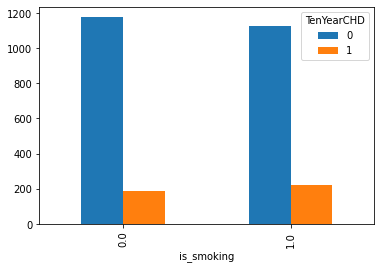

In [ ]:
# plotting graph for checking how many users are smoking or not and how it affects the target variable

pd.crosstab(train['is_smoking'],train['TenYearCHD']).plot(kind='bar')

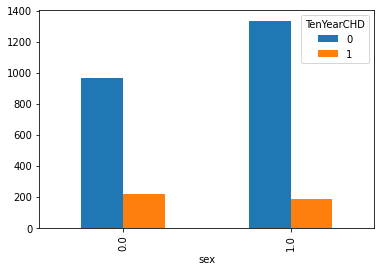

In [ ]:
# plotting graph for checking how many persons are male or female and how it affects the target variable

pd.crosstab(train['sex'],train['TenYearCHD']).plot(kind='bar')

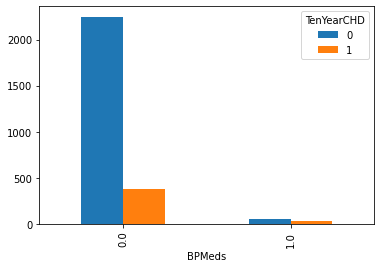

In [ ]:
# plotting graph for checking  whether  patient was on blood pressure medication or not and how it affects the target variable

pd.crosstab(train['BPMeds'],train['TenYearCHD']).plot(kind='bar')

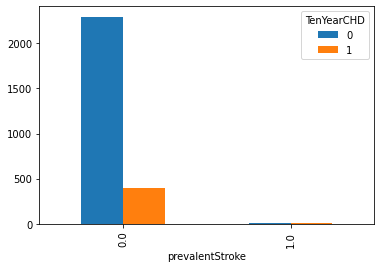

In [ ]:
# plotting graph for checking  whether or not the patient had previously had a stroke and how it affects the target variable

pd.crosstab(train['prevalentStroke'],train['TenYearCHD']).plot(kind='bar')

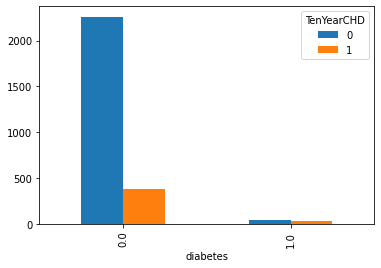

In [ ]:
# plotting graph for checking if person is diabetic or not and how it affects the target variable

pd.crosstab(train['diabetes'],train['TenYearCHD']).plot(kind='bar')

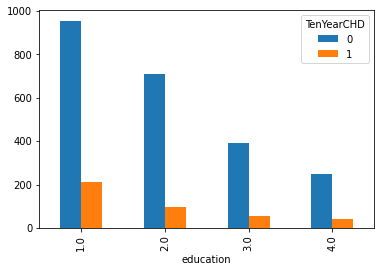

In [ ]:
# plotting graph for checking the education values and how it affects the target variable

pd.crosstab(train['education'],train['TenYearCHD']).plot(kind='bar')

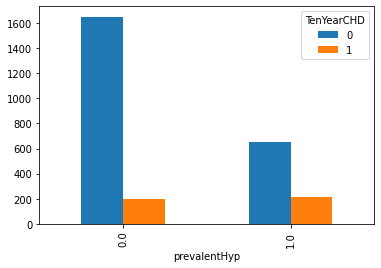

In [ ]:
# plotting graph for checking whether or not the patient was hypertensive and how it affects the target variable

pd.crosstab(train['prevalentHyp'],train['TenYearCHD']).plot(kind='bar')

##**Data Distribution for different target variable labels**

In [ ]:
# plotting  data distribution for different columns

def plot(col_name):
  print('\033[1m Ten Year CHD Values for different '+col_name+' values')
  ax = train.hist(column=col_name,by="TenYearCHD",bins=30)
  

 Ten Year CHD Values for different age values


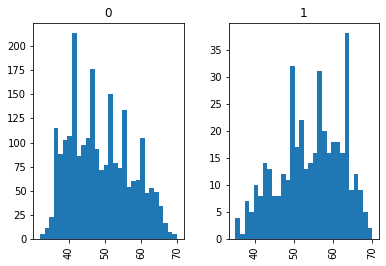

In [ ]:
# data distribution for age column
plot('age')

 Ten Year CHD Values for different education values


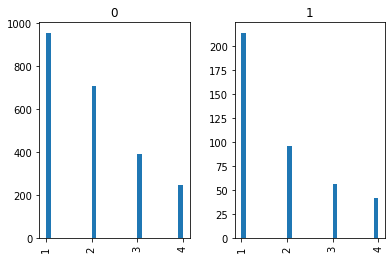

In [ ]:
# data distribution for education column
plot('education')

 Ten Year CHD Values for different sex values


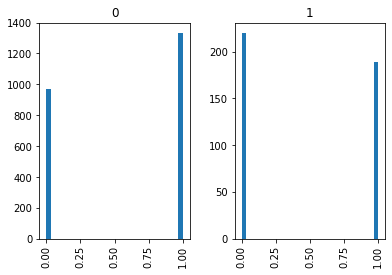

In [ ]:
# data distribution for sex column
plot('sex')

 Ten Year CHD Values for different is_smoking values


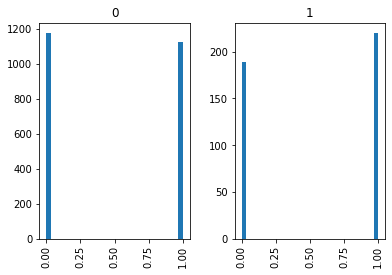

In [ ]:
# data distribution for is_smoking column
plot('is_smoking')

 Ten Year CHD Values for different cigsPerDay values


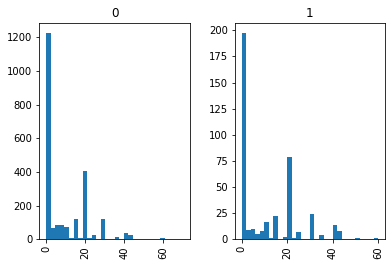

In [ ]:
# data distribution for cigsPerDay column
plot('cigsPerDay')

 Ten Year CHD Values for different BPMeds values


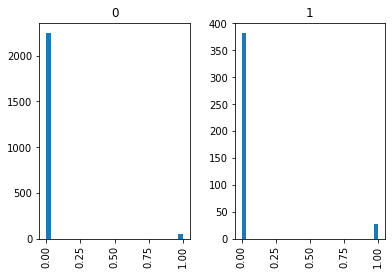

In [ ]:

# data distribution for BPMeds column
plot('BPMeds')

 Ten Year CHD Values for different prevalentStroke values


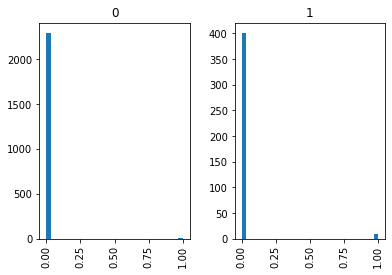

In [ ]:
# data distribution for prevalentStroke column
plot('prevalentStroke')

 Ten Year CHD Values for different prevalentHyp values


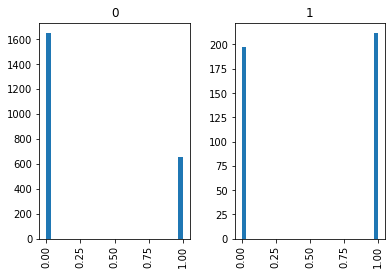

In [ ]:
# data distribution for prevalentHyp column
plot('prevalentHyp')

 Ten Year CHD Values for different diabetes values


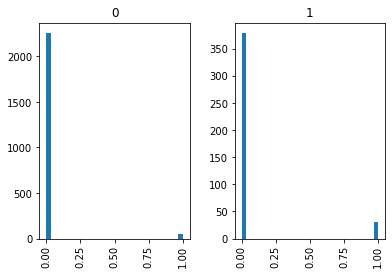

In [ ]:
# data distribution for diabetes column
plot('diabetes')

 Ten Year CHD Values for different totChol values


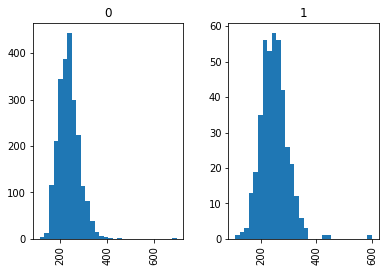

In [ ]:
# data distribution for total cholesterol column
plot('totChol')

 Ten Year CHD Values for different sysBP values


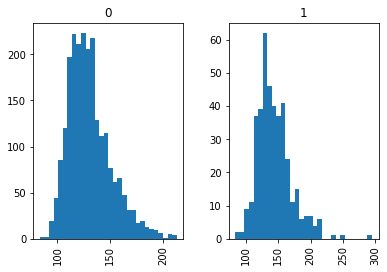

In [ ]:
# data distribution for total systolic blood pressure column
plot('sysBP')

 Ten Year CHD Values for different diaBP values


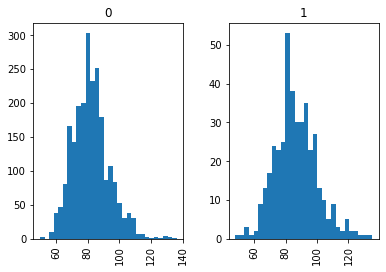

In [ ]:
# data distribution for diastolic blood pressure column
plot('diaBP')

 Ten Year CHD Values for different BMI values


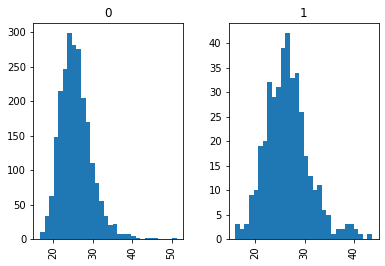

In [ ]:
# data distribution for Body Mass Index column
plot('BMI')

 Ten Year CHD Values for different heartRate values


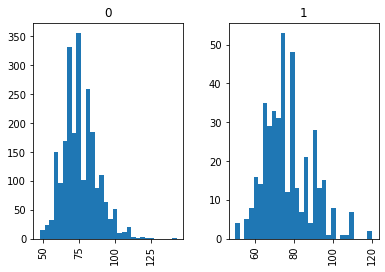

In [ ]:
# data distribution for heartrate column
plot('heartRate')

 Ten Year CHD Values for different glucose values


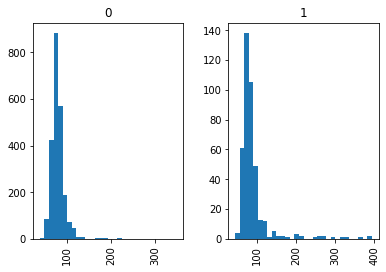

In [ ]:
# data distribution for glucose column
plot('glucose')

##**Outliers Detection**

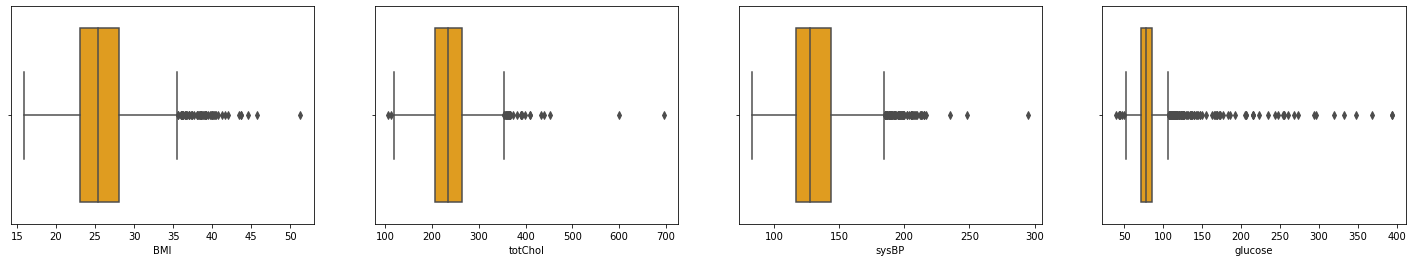

In [ ]:
# plotting different column values to check outliers

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,4))
sns.boxplot(x=train['BMI'],ax=ax1,color = 'orange')
sns.boxplot(x=train['totChol'],ax=ax2,color = 'orange')
sns.boxplot(x=train['sysBP'],ax=ax3,color = 'orange')
sns.boxplot(x=train['glucose'],ax=ax4,color = 'orange')


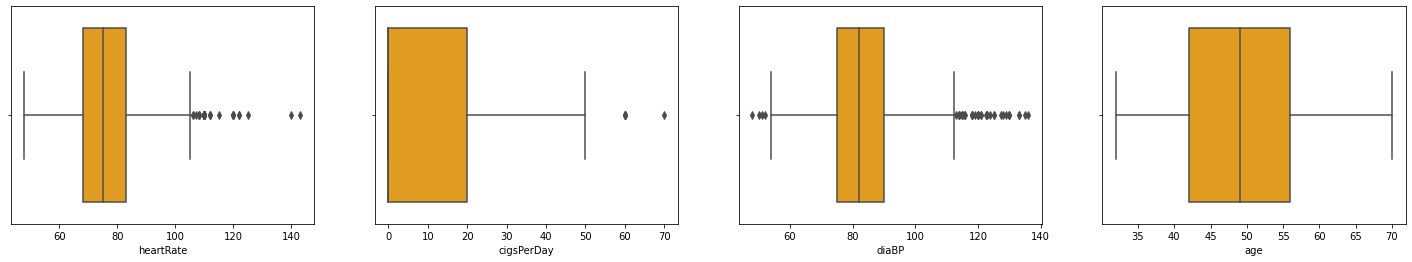

In [ ]:
# plotting different column values to check outliers

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,4))
sns.boxplot(x=train['heartRate'],ax=ax1,color = 'orange')
sns.boxplot(x=train['cigsPerDay'],ax=ax2,color = 'orange')
sns.boxplot(x=train['diaBP'],ax=ax3,color = 'orange')
sns.boxplot(x=train['age'],ax=ax4,color = 'orange')


**Treatment of outliers for training and testing data**

In [ ]:
# function to find outliers using Z score
outlier_list = []

def outlier_detection(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)    
    for data_point in data:
        z_score = (data_point -mean)/std
        if (np.abs(z_score) > thres):
            outlier_list.append(data_point)
    return outlier_list


In [ ]:
cols = ['BMI','totChol','sysBP','glucose','heartRate','cigsPerDay','diaBP','age']
for col in cols:
  outlier_values = outlier_detection(train[col])
  print("number of Outliers for feature {}: ".format(col), len(outlier_values))

number of Outliers for feature BMI:  36
number of Outliers for feature totChol:  49
number of Outliers for feature sysBP:  78
number of Outliers for feature glucose:  116
number of Outliers for feature heartRate:  130
number of Outliers for feature cigsPerDay:  140
number of Outliers for feature diaBP:  163
number of Outliers for feature age:  163


In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
def treat_outliers(data):
  fifth_qunatile = data.quantile(0.05) 
  ninetyfive_qunatile  = data.quantile(0.95) 
  data.clip(fifth_qunatile, ninetyfive_qunatile, inplace=True)

for col in cols:
  treat_outliers(train[col])


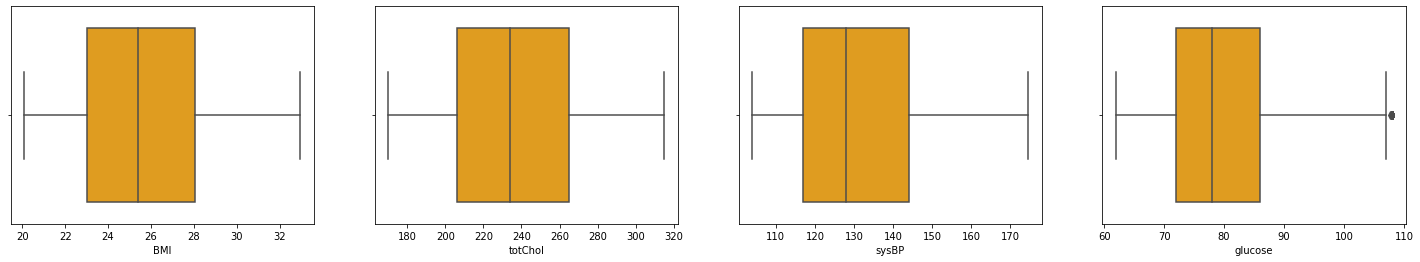

In [ ]:
# plotting different column values to check outliers if they exist or not 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,4))
sns.boxplot(x=train['BMI'],ax=ax1,color = 'orange')
sns.boxplot(x=train['totChol'],ax=ax2,color = 'orange')
sns.boxplot(x=train['sysBP'],ax=ax3,color = 'orange')
sns.boxplot(x=train['glucose'],ax=ax4,color = 'orange')


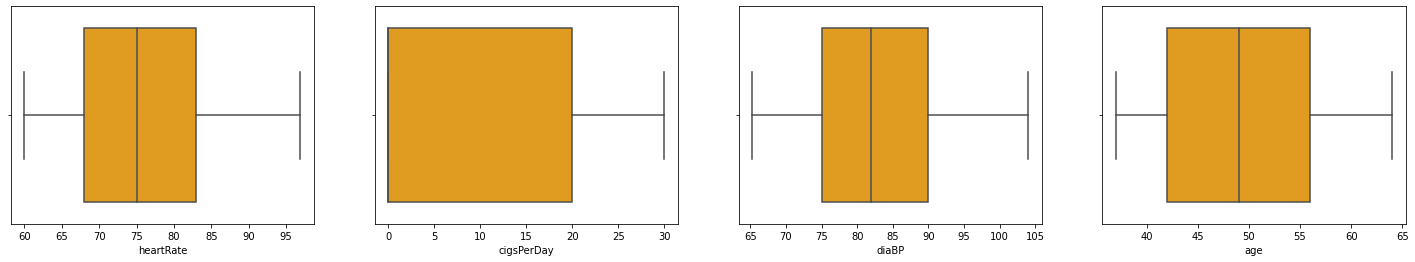

In [ ]:
# plotting different column values to check outliers if they exist or not

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,4))
sns.boxplot(x=train['heartRate'],ax=ax1,color = 'orange')
sns.boxplot(x=train['cigsPerDay'],ax=ax2,color = 'orange')
sns.boxplot(x=train['diaBP'],ax=ax3,color = 'orange')
sns.boxplot(x=train['age'],ax=ax4,color = 'orange')

**Outliers removed from training data**

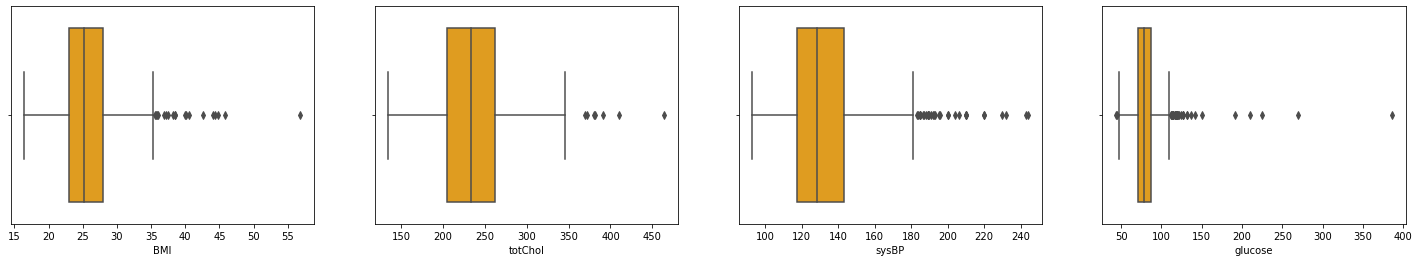

In [ ]:
# plotting different column values to check outliers (test data)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,4))
sns.boxplot(x=test['BMI'],ax=ax1,color = 'orange')
sns.boxplot(x=test['totChol'],ax=ax2,color = 'orange')
sns.boxplot(x=test['sysBP'],ax=ax3,color = 'orange')
sns.boxplot(x=test['glucose'],ax=ax4,color = 'orange')

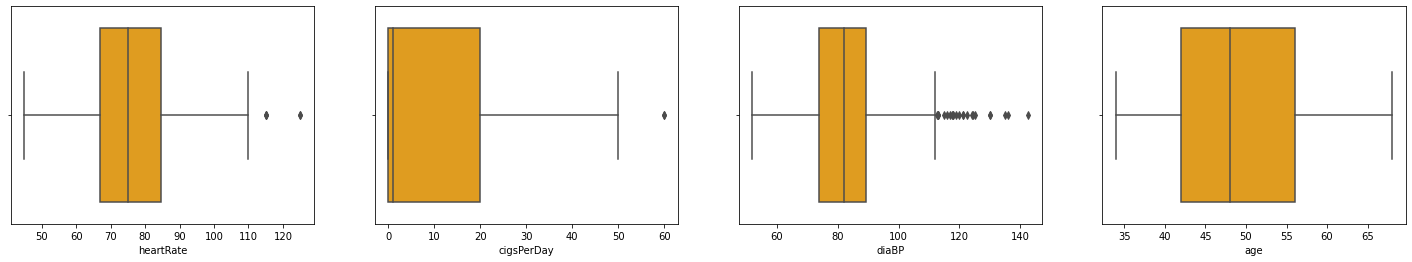

In [ ]:
# plotting different column values to check outliers (test data)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,4))
sns.boxplot(x=test['heartRate'],ax=ax1,color = 'orange')
sns.boxplot(x=test['cigsPerDay'],ax=ax2,color = 'orange')
sns.boxplot(x=test['diaBP'],ax=ax3,color = 'orange')
sns.boxplot(x=test['age'],ax=ax4,color = 'orange')

In [ ]:
# outlier treatment for test data
for col in cols:
  treat_outliers(test[col])

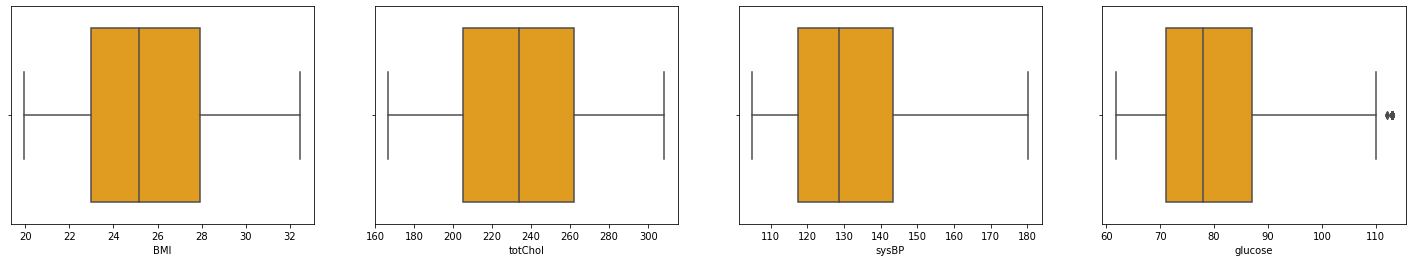

In [ ]:
# plotting different column values to check outliers (test data) if exist or not

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,4))
sns.boxplot(x=test['BMI'],ax=ax1,color = 'orange')
sns.boxplot(x=test['totChol'],ax=ax2,color = 'orange')
sns.boxplot(x=test['sysBP'],ax=ax3,color = 'orange')
sns.boxplot(x=test['glucose'],ax=ax4,color = 'orange')

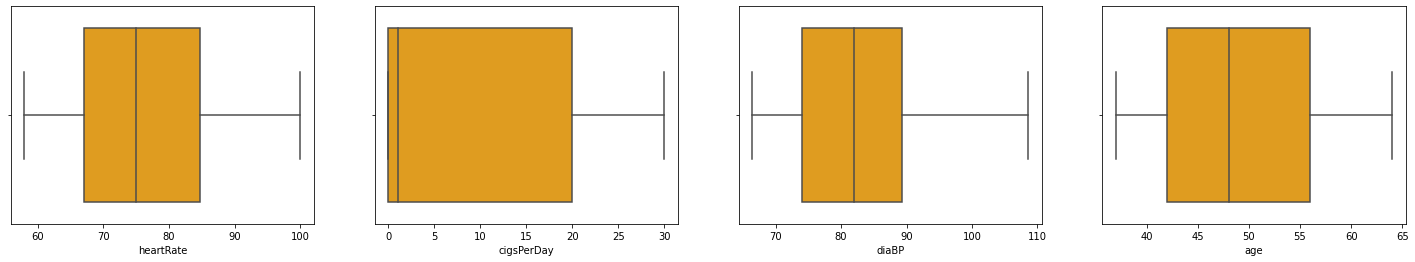

In [ ]:
# plotting different column values to check outliers (test data) if exist or not

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,4))
sns.boxplot(x=test['heartRate'],ax=ax1,color = 'orange')
sns.boxplot(x=test['cigsPerDay'],ax=ax2,color = 'orange')
sns.boxplot(x=test['diaBP'],ax=ax3,color = 'orange')
sns.boxplot(x=test['age'],ax=ax4,color = 'orange')

**Treatment of outliers in test data done**

**Checking collinearity between variables**

In [ ]:
independent_variables = ['age','education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
dependent_variables = ['TenYearCHD']   

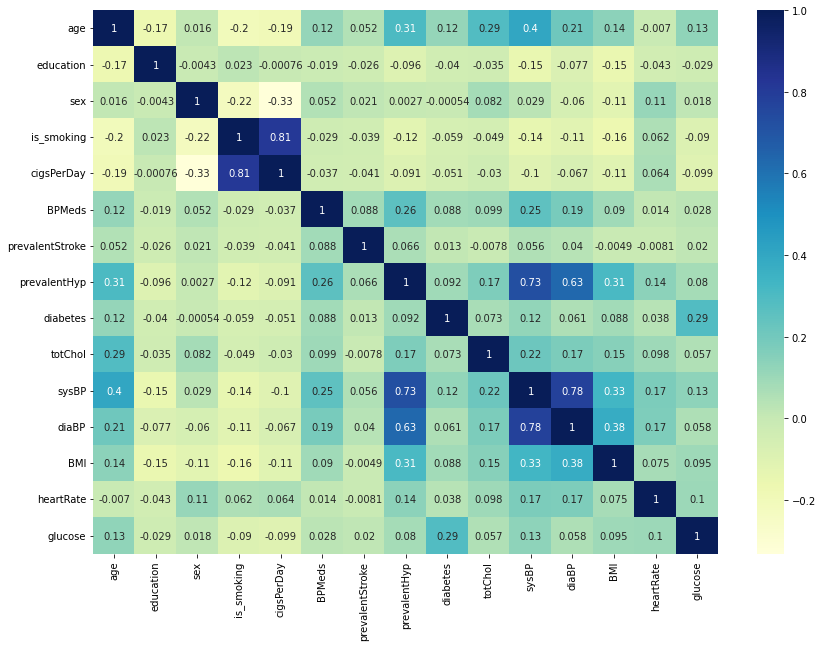

In [ ]:
# checking correlation between variables

correlation_calc = train[independent_variables].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_calc,  annot=True, cmap="YlGnBu")

In [ ]:
# dropping columns to remove rows which are combined
train['bpratio'] = round(train['sysBP']/train['diaBP'],2)
test['bpratio'] = round(test['sysBP']/test['diaBP'],2)
train.drop(['diaBP'],axis=1,inplace=True)
test.drop(['diaBP'],axis=1,inplace=True)

In [ ]:
# dropping is_smoking column as cigsPerDay is highly correlated to it

train.drop(['is_smoking'],axis=1,inplace=True)
test.drop(['is_smoking'],axis=1,inplace=True)

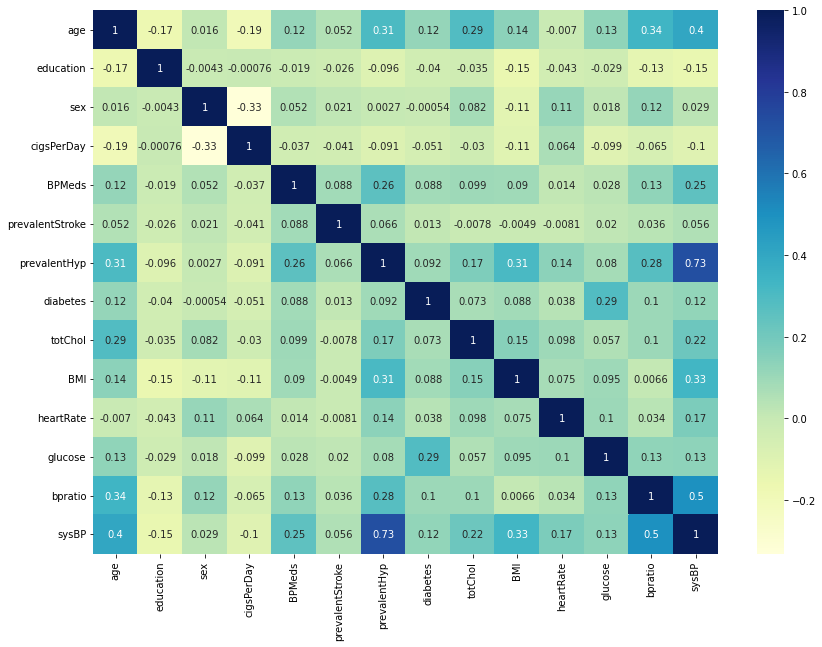

In [ ]:
# checking correlation between variables
independent_variables = ['age','education', 'sex', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
        'BMI', 'heartRate', 'glucose','bpratio','sysBP']

correlation_calc = train[independent_variables].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_calc,  annot=True, cmap="YlGnBu")

In [ ]:
train.drop(['prevalentHyp'],axis=1,inplace=True)
test.drop(['prevalentHyp'],axis=1,inplace=True)


## **Resampling of data as data is imbalanced**

In [ ]:
independent_variables = ['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
        'diabetes', 'totChol', 'sysBP', 'BMI', 'heartRate',
       'glucose',  'bpratio']
dependent_variable = ['TenYearCHD']

In [ ]:
train_independent = train[independent_variables]
train_dependent =  train[dependent_variables]

In [ ]:
train_independent.columns

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'diabetes', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose',
       'bpratio'],
      dtype='object')

In [ ]:
train_dependent['TenYearCHD'].value_counts()

0    2303
1     409
Name: TenYearCHD, dtype: int64

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_train, y_train = smote_enn.fit_resample(train[independent_variables], train[dependent_variables])
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='majority')
X_train, y_train = tl.fit_resample(X_train, y_train)
#from imblearn.over_sampling import SMOTE
#oversample = SMOTE()
#X_train, y_train = oversample.fit_resample(train[independent_variables], train[dependent_variables])

In [ ]:
y_train.value_counts()

TenYearCHD
1             2097
0             1267
dtype: int64

**Data is now balanced data**

##**Models Implementation for fitting the training data**

## **Decision Tree Classifier**

In [ ]:
train_independent = X_train
train_dependent = y_train

In [ ]:
from sklearn.tree import DecisionTreeClassifier
  
# create a regressor object
classifier= DecisionTreeClassifier(random_state = 0) 
  
# fit the regressor with X and Y data
classifier.fit(train_independent, train_dependent)

DecisionTreeClassifier(random_state=0)

In [ ]:
# accuracy score for training data

y_pred = classifier.predict(test[independent_variables])
accuracy_score(train_dependent, classifier.predict(train_independent))

1.0

In [ ]:
# accuracy score  for testing data

accuracy_score(test[dependent_variables], classifier.predict(test[independent_variables]))

0.668141592920354

In [ ]:
# recall score for training data set
from sklearn.metrics import recall_score
recall_score(train_dependent, classifier.predict(train_independent))

1.0

In [ ]:
# recall score for testing data set
recall_score(test[dependent_variables], classifier.predict(test[independent_variables]))

0.4411764705882353

**Our goal is to increase recall score as per the problem so as patient is not diagnosed incorrectly**

In [ ]:
# using standard scaler to transform data 

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train=scaler.fit_transform(train_independent)
X_test=scaler.fit_transform(test[independent_variables])

In [ ]:
# Again implementing decision tree classifier

classifier= DecisionTreeClassifier(random_state = 0) 
classifier.fit(X_train, train_dependent)

DecisionTreeClassifier(random_state=0)

In [ ]:
# recall score 
recall_score(train_dependent, classifier.predict(X_train))

1.0

In [ ]:
# recall score increased for testing data
recall_score(test[dependent_variables], classifier.predict(X_test))

0.7745098039215687

In [ ]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

Feature: 0, Score: 0.27615
Feature: 1, Score: 0.07004
Feature: 2, Score: 0.03965
Feature: 3, Score: 0.09212
Feature: 4, Score: 0.00193
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00985
Feature: 7, Score: 0.09129
Feature: 8, Score: 0.12525
Feature: 9, Score: 0.06641
Feature: 10, Score: 0.08398
Feature: 11, Score: 0.08466
Feature: 12, Score: 0.05867


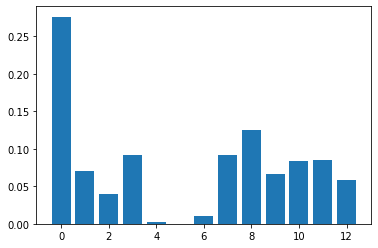

In [ ]:
# importance of features can be seen using feature_importances_

importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**Hyperparameter Tuning on decision tree classifier**

In [ ]:
# applying hyperparameter tuning to control overfitting and find optimal hyperparameters

grid = {"max_depth": [16,17,18],"criterion": ["gini",'entropy'],"min_samples_split":[2,3,4]}

grid = GridSearchCV(classifier, grid, refit = True, verbose = 3, cv=3)
grid.fit(X_train, train_dependent)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END criterion=gini, max_depth=16, min_samples_split=2;, score=0.773 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, min_samples_split=2;, score=0.864 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, min_samples_split=2;, score=0.903 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, min_samples_split=3;, score=0.768 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=16, min_samples_split=3;, score=0.870 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, min_samples_split=3;, score=0.897 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, min_samples_split=4;, score=0.772 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, min_samples_split=4;, score=0.857 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, min_samples_split=4;, score=0.893 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=17, min_samples_split=2;, score=0.76

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [16, 17, 18],
                         'min_samples_split': [2, 3, 4]},
             verbose=3)

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 2}

In [ ]:
# recall score for training data

recall_score(train_dependent, grid.predict(X_train))

1.0

In [ ]:
# recall score for testing data

recall_score(test[dependent_variables], grid.predict(X_test))

0.7843137254901961

In [ ]:
from sklearn.metrics import precision_score
precision_score(test[dependent_variables], grid.predict(X_test))

0.16701461377870563

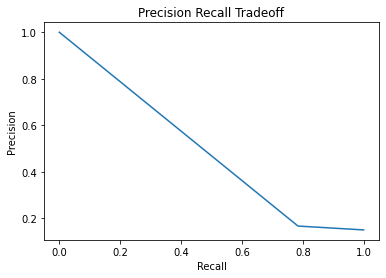

In [ ]:
from sklearn.metrics import precision_recall_curve
y_decision_function = grid.predict(X_test)
precision,recall,threshold = precision_recall_curve(test[dependent_variables],y_decision_function)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Tradeoff')
plt.show() 

confusion matrix
[[173 403]
 [ 25  77]]


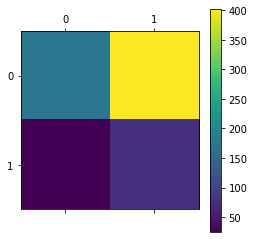

In [ ]:
#Confusion Matrix to see false negatives , true positives, true negatives, false positives

conf_matrix = confusion_matrix(test[dependent_variables], grid.predict(X_test))
print("confusion matrix")
print(conf_matrix)
plt.matshow(conf_matrix)
plt.colorbar()

In [ ]:
# classification report

print("Classification Report",classification_report(test[dependent_variables], grid.predict(X_test)))

Classification Report               precision    recall  f1-score   support

           0       0.88      0.31      0.46       576
           1       0.16      0.75      0.27       102

    accuracy                           0.38       678
   macro avg       0.52      0.53      0.36       678
weighted avg       0.77      0.38      0.43       678



# **SVM Classifier**

In [ ]:
model = svm.SVC(C=1.0, kernel='linear', class_weight='balanced')
model.fit(X_train, train_dependent.values.ravel())

SVC(class_weight='balanced', kernel='linear')

In [ ]:
print("Classification Report",classification_report(test[dependent_variables], model.predict(X_test)))

Classification Report               precision    recall  f1-score   support

           0       0.93      0.49      0.65       576
           1       0.22      0.80      0.34       102

    accuracy                           0.54       678
   macro avg       0.58      0.65      0.49       678
weighted avg       0.83      0.54      0.60       678



In [ ]:
accuracy_score(test[dependent_variables], model.predict(X_test))

0.5398230088495575

In [ ]:
precision_score(test[dependent_variables], model.predict(X_test))

0.2192513368983957

In [ ]:
recall_score(test[dependent_variables], model.predict(X_test))

0.803921568627451

In [ ]:
param_grid = {  
              'kernel': ['rbf','linear'],'class_weight':['balanced']}
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, train_dependent.values.ravel())

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END .class_weight=balanced, kernel=rbf;, score=0.801 total time=   0.4s
[CV 2/5] END .class_weight=balanced, kernel=rbf;, score=0.814 total time=   0.4s
[CV 3/5] END .class_weight=balanced, kernel=rbf;, score=0.820 total time=   0.4s
[CV 4/5] END .class_weight=balanced, kernel=rbf;, score=0.844 total time=   0.4s
[CV 5/5] END .class_weight=balanced, kernel=rbf;, score=0.848 total time=   0.4s
[CV 1/5] END class_weight=balanced, kernel=linear;, score=0.736 total time=   0.4s
[CV 2/5] END class_weight=balanced, kernel=linear;, score=0.736 total time=   0.4s
[CV 3/5] END class_weight=balanced, kernel=linear;, score=0.752 total time=   0.4s
[CV 4/5] END class_weight=balanced, kernel=linear;, score=0.753 total time=   0.4s
[CV 5/5] END class_weight=balanced, kernel=linear;, score=0.759 total time=   0.4s


GridSearchCV(estimator=SVC(),
             param_grid={'class_weight': ['balanced'],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [ ]:
print("Classification Report",classification_report(test[dependent_variables], grid.predict(X_test)))

Classification Report               precision    recall  f1-score   support

           0       0.89      0.51      0.65       576
           1       0.19      0.66      0.30       102

    accuracy                           0.53       678
   macro avg       0.54      0.58      0.47       678
weighted avg       0.79      0.53      0.60       678



In [ ]:
recall_score(test[dependent_variables], grid.predict(X_test))

0.6568627450980392

In [ ]:
precision_score(test[dependent_variables], grid.predict(X_test))

0.1925287356321839

In [ ]:
accuracy_score(test[dependent_variables], grid.predict(X_test))

0.5339233038348082

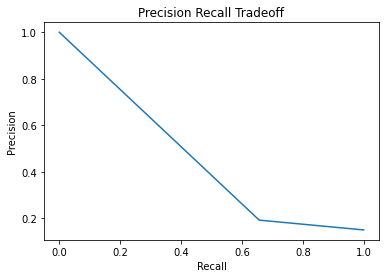

In [ ]:
from sklearn.metrics import precision_recall_curve
y_decision_function = grid.predict(X_test)
precision,recall,threshold = precision_recall_curve(test[dependent_variables],y_decision_function)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Tradeoff')
plt.show() 

**Hyperparameter tuning reduced recall score value which is not acceptable for this scenario**

## **Random Forest Classifier with hyper parameter tuning**

In [ ]:
# creating grid for hyperparameters

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [ ]:
# using randomized search cv

clf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
rf = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
# fitting model

rf.fit(X_train, train_dependent.values.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

**Evaluation Metrics**

In [ ]:
# recall score on training data
recall_score(train_dependent, rf.predict(X_train))

1.0

In [ ]:
# accuracy score on training data
accuracy_score(train_dependent, rf.predict(X_train))

1.0

In [ ]:
# accuracy score on test data
accuracy_score(test[dependent_variables], rf.predict(X_test))

0.2359882005899705

In [ ]:
# recall score on test data

recall_score(test[dependent_variables], rf.predict(X_test))

0.9411764705882353

In [ ]:
# precision score on test data
from sklearn.metrics import precision_score
precision_score(test[dependent_variables], rf.predict(X_test))

0.15789473684210525

confusion matrix
[[ 64 512]
 [  6  96]]


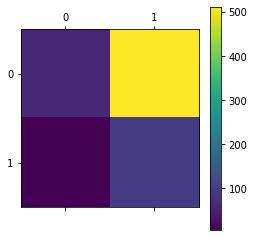

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(test[dependent_variables], rf.predict(X_test))
print("confusion matrix")
print(conf_matrix)
plt.matshow(conf_matrix)
plt.colorbar()

In [ ]:
from sklearn.metrics import precision_recall_curve
y_decision_function = grid.predict(X_test)
precision,recall,threshold = precision_recall_curve(test[dependent_variables],y_decision_function)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Tradeoff')
plt.show() 

# **Logistic Regression**

In [ ]:
# logistic regression classifier
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,class_weight='balanced')

In [ ]:
# fitting scaled data

clf.fit(X_train, train_dependent.values.ravel())

LogisticRegression(class_weight='balanced', random_state=0)

###**Evaluation of Model**

In [ ]:
# accuracy score on test data
accuracy_score(test[dependent_variables], clf.predict(X_test))

0.5457227138643068

In [ ]:
# precision score on test data

precision_score(test[dependent_variables], clf.predict(X_test))

0.22162162162162163

In [ ]:
# recall score  for training data

recall_score(train_dependent, clf.predict(X_train))

0.7587029089175011

In [ ]:
# recall score  for testing data
recall_score(test[dependent_variables], clf.predict(X_test))

0.803921568627451

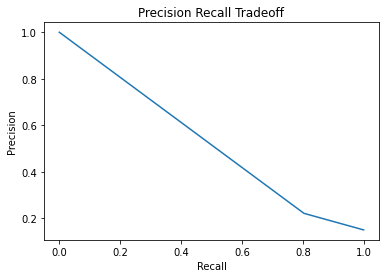

In [ ]:
from sklearn.metrics import precision_recall_curve
y_decision_function = clf.predict(X_test)
precision,recall,threshold = precision_recall_curve(test[dependent_variables],y_decision_function)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Tradeoff')
plt.show() 

In [ ]:
#classification report

print("Classification Report",classification_report(test[dependent_variables], clf.predict(X_test)))

Classification Report               precision    recall  f1-score   support

           0       0.94      0.50      0.65       576
           1       0.22      0.80      0.35       102

    accuracy                           0.55       678
   macro avg       0.58      0.65      0.50       678
weighted avg       0.83      0.55      0.61       678



confusion matrix
[[288 288]
 [ 20  82]]


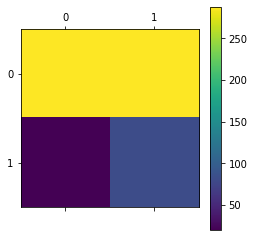

In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(test[dependent_variables], clf.predict(X_test))
print("confusion matrix")
print(conf_matrix)
plt.matshow(conf_matrix)
plt.colorbar()

**Data was imbalanced , SMOTE was used to balance the dataset and to improve the results**

**Hyper parameter tuning was applied using Grid Search CV and randomized search cv for different models**

**Recall of 80% is achieved using logistic regression**

**Recall of 94% is achieved using Random Forest Classifer**

**Recall of 80 % is achieved using SVM Classifier**

**Recall of 78% is achieved using Decision Tree Classifier**


